# Package import

In [1]:
from models import *
from evaluate import *
from preprocessing import *

# Data load

In [2]:
# stock data
AAPL = pd.read_csv('../data/AAPL.csv')

# index data
SP500 = pd.read_csv('../data/SP500.csv')
DOLLAR = pd.read_csv('../data/DOLLAR.csv')
NASDAQ = pd.read_csv('../data/NASDAQ.csv')

# noise data
noise = pd.read_csv('../data/noise_data.csv')

# Data preprocessing

In [3]:
# stock data
X_seq_train_stock, y_seq_train_stock, X_seq_test_stock, y_seq_test_stock, scaler = \
    stock_preprocessing(AAPL, window_size=7, future_step=1, split_date='2023-08-01')


# index data
# SP500
X_seq_train_sp500, X_seq_test_sp500 = \
    preprocessing_index_noise(SP500, window_size=7, future_step=1, split_date='2023-08-01', data_type='index')

# DOLLAR
X_seq_train_dollar, X_seq_test_dollar = \
    preprocessing_index_noise(DOLLAR, window_size=7, future_step=1, split_date='2023-08-01', data_type='index')

# NASDAQ
X_seq_train_nasdaq, X_seq_test_nasdaq = \
    preprocessing_index_noise(NASDAQ, window_size=7, future_step=1, split_date='2023-08-01', data_type='index')

# data concatenation
X_seq_train_index = np.concatenate((X_seq_train_sp500, X_seq_train_dollar, X_seq_train_nasdaq), axis=1)
X_seq_test_index = np.concatenate((X_seq_test_sp500, X_seq_test_dollar, X_seq_test_nasdaq), axis=1)


# noise data
X_seq_train_noise, X_seq_test_noise = preprocessing_index_noise(noise, window_size=7, future_step=1, data_type='noise')

# Model_hyperparameter config

In [4]:
class Config:
    def __init__(self, validation_split=0.2, verbose=2, epochs=100, batch_size=32, learning_rate=0.001, 
                 lstm_node1=64, lstm_node2=32, drop_out_rate=0.5):
        # train
        self.validation_split = validation_split
        self.verbose = verbose
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate

        # model
        self.lstm_node1 = lstm_node1
        self.lstm_node2 = lstm_node2
        self.drop_out_rate = drop_out_rate

# Dataframe for score-compare

In [5]:
result = pd.DataFrame(columns=['MSE', 'MAPE'], index=['stock', 'stock+index', 'stock+noise', 'stock+index+noise'])
result

,MSE,MAPE
stock,NaN,NaN
stock+index,NaN,NaN
stock+noise,NaN,NaN
stock+index+noise,NaN,NaN


# LSTM (only-stock)

In [6]:
stock_config = Config(epochs=50,
                      batch_size=32,
                      learning_rate=0.001,
                      lstm_node1=64,
                      lstm_node2=32,
                      drop_out_rate=0.5)

In [7]:
stock_config = Config(epochs=50,
                      batch_size=32,
                      learning_rate=0.001,
                      lstm_node1=128,
                      lstm_node2=64,
                      drop_out_rate=0.4)

c:\Users\Xenrose\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,129 (469.25 KB)

 Trainable params: 120,129 (469.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


23/23 - 2s - 94ms/step - loss: 0.2328 - val_loss: 0.0766
Epoch 2/50
23/23 - 0s - 5ms/step - loss: 0.0639 - val_loss: 0.0665
Epoch 3/50
23/23 - 0s - 4ms/step - loss: 0.0465 - val_loss: 0.0574
Epoch 4/50
23/23 - 0s - 4ms/step - loss: 0.0431 - val_loss: 0.0503
Epoch 5/50
23/23 - 0s - 4ms/step - loss: 0.0404 - val_loss: 0.0327
Epoch 6/50
23/23 - 0s - 4ms/step - loss: 0.0440 - val_loss: 0.0315
Epoch 7/50
23/23 - 0s - 4ms/step - loss: 0.0374 - val_loss: 0.0195
Epoch 8/50
23/23 - 0s - 4ms/step - loss: 0.0367 - val_loss: 0.0316
Epoch 9/50
23/23 - 0s - 5ms/step - loss: 0.0404 - val_loss: 0.0214
Epoch 10/50
23/23 - 0s - 6ms/step - loss: 0.0339 - val_loss: 0.0353
Epoch 11/50
23/23 - 0s - 4ms/step - loss: 0.0322 - val_loss: 0.0388
Epoch 12/50
23/23 - 0s - 4ms/step - loss: 0.0373 - val_loss: 0.0146
Epoch 13/50
23/23 - 0s - 4ms/step - loss: 0.0357 - val_loss: 0.0206
Epoch 14/50
23/23 - 0s - 5ms/step - loss: 0.0337 - val_loss: 0.0191
Epoch 15/50
23/23 - 0s - 4ms/step - loss: 0.0332 - val_loss: 0.0139

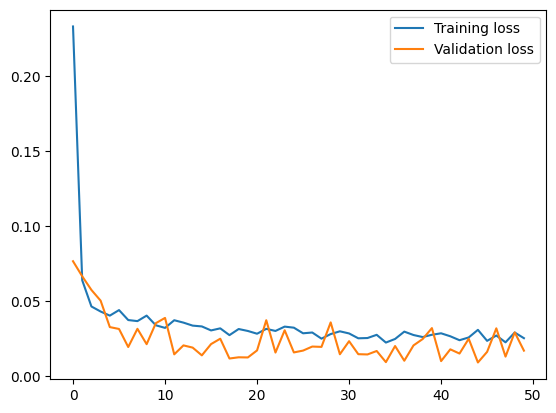

Training loss:  0.02535315416753292
Validation loss:  0.017059944570064545
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


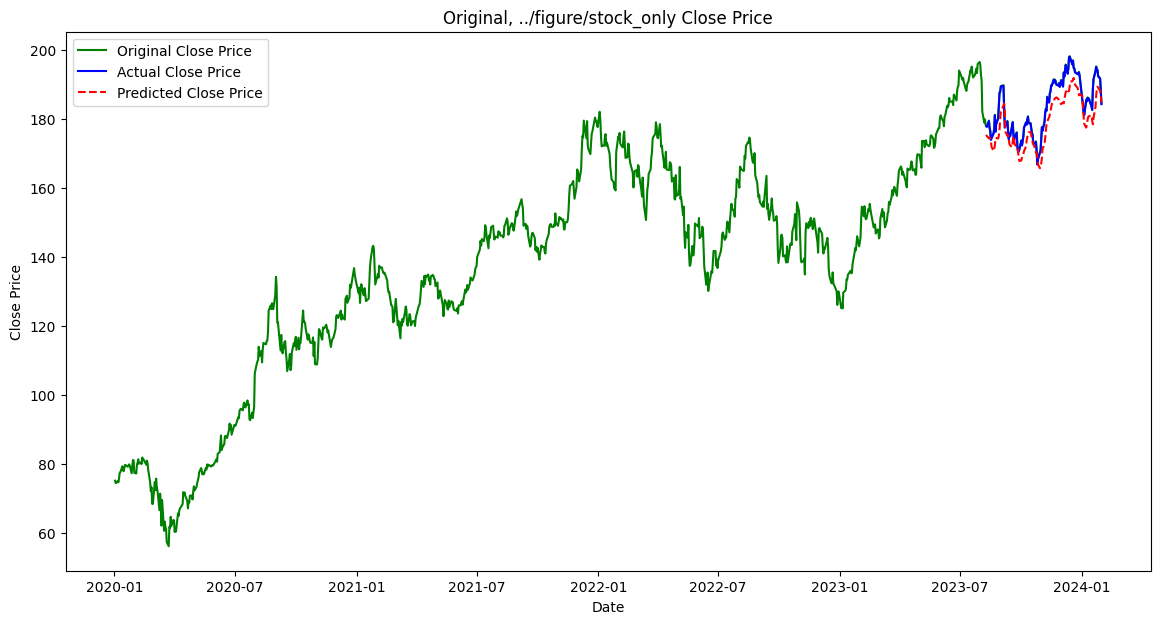

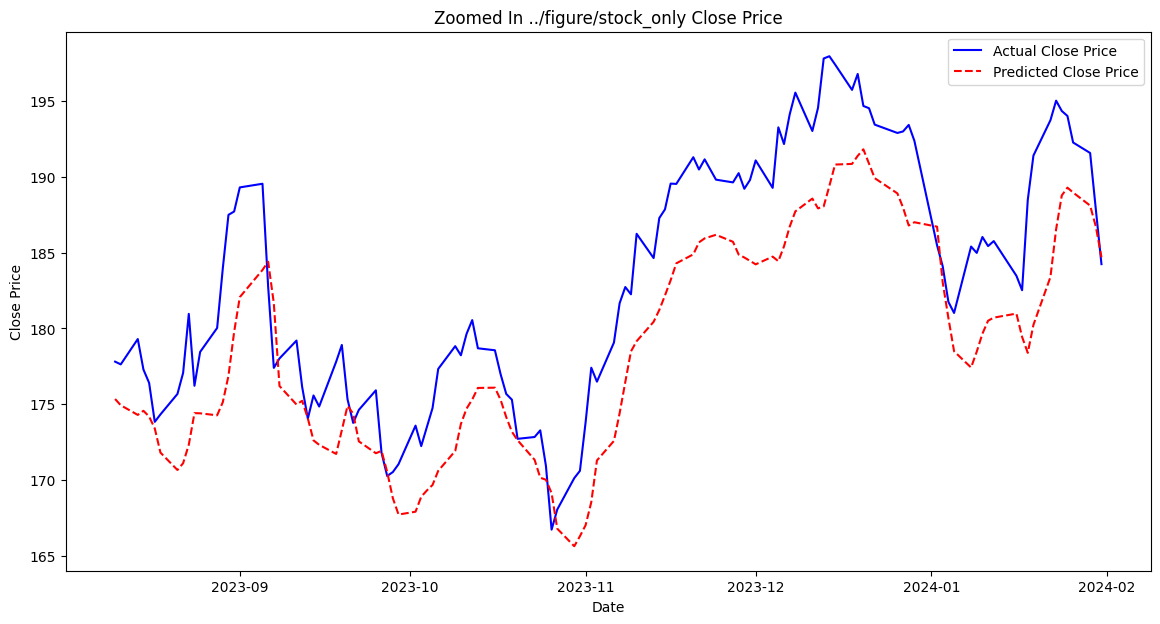

In [8]:
stock_lstm = lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock)
y_pred = stock_lstm.predict(X_seq_test_stock)


y_pred, y_test = unpack_scaled(y_pred, y_seq_test_stock, scaler)


visualize(AAPL, y_pred, y_test, "../figure/stock_only")
zoom_visualize(AAPL, y_pred, y_test, "../figure/stock_only")

In [9]:
result.loc['stock'] = evaluate_report(y_pred, y_test)

Mean Squared Error:  27.226
Mean Absolute Percentage Error:  0.025


# LSTM (stock + index)

In [10]:
stock_index_config = Config(epochs=50,
                            batch_size=32,
                            learning_rate=0.001,
                            lstm_node1=64,
                            lstm_node2=32,
                            drop_out_rate=0.5)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 21, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 7, 128)    │     70,656 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 21, 128)   │     70,656 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 7, 128)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 21, 128)   │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     49,408 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 64)        │     49,408 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ dropout_3[0][0],  │
│ (Concatenate)       │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 240,257 (938.50 KB)

 Trainable params: 240,257 (938.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 - 4s - 163ms/step - loss: 0.1587 - val_loss: 0.2124
Epoch 2/50
23/23 - 0s - 9ms/step - loss: 0.0516 - val_loss: 0.1309
Epoch 3/50
23/23 - 0s - 9ms/step - loss: 0.0382 - val_loss: 0.0554
Epoch 4/50
23/23 - 0s - 11ms/step - loss: 0.0362 - val_loss: 0.0552
Epoch 5/50
23/23 - 0s - 9ms/step - loss: 0.0381 - val_loss: 0.0409
Epoch 6/50
23/23 - 0s - 9ms/step - loss: 0.0347 - val_loss: 0.0938
Epoch 7/50
23/23 - 0s - 9ms/step - loss: 0.0292 - val_loss: 0.0382
Epoch 8/50
23/23 - 0s - 9ms/step - loss: 0.0326 - val_loss: 0.0264
Epoch 9/50
23/23 - 0s - 9ms/step - loss: 0.0319 - val_loss: 0.0372
Epoch 10/50
23/23 - 0s - 9ms/step - loss: 0.0303 - val_loss: 0.0378
Epoch 11/50
23/23 - 0s - 9ms/step - loss: 0.0332 - val_loss: 0.0234
Epoch 12/50
23/23 - 0s - 9ms/step - loss: 0.0300 - val_loss: 0.0373
Epoch 13/50
23/23 - 0s - 9ms/step - loss: 0.0261 - val_loss: 0.0340
Epoch 14/50
23/23 - 0s - 9ms/step - loss: 0.0314 - val_loss: 0.0512
Epoch 15/50
23/23 - 0s - 9ms/step - loss: 0.0248 - val

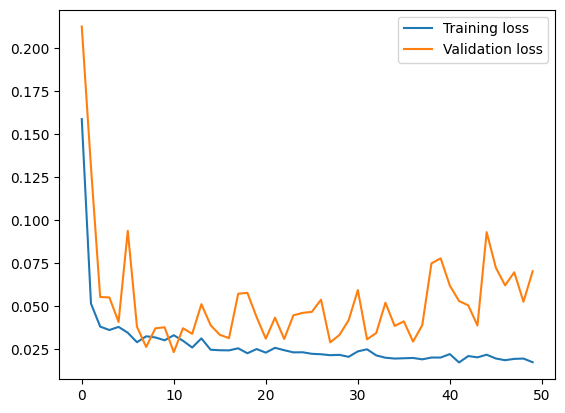

Training loss:  0.017549356445670128
Validation loss:  0.07035570591688156
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


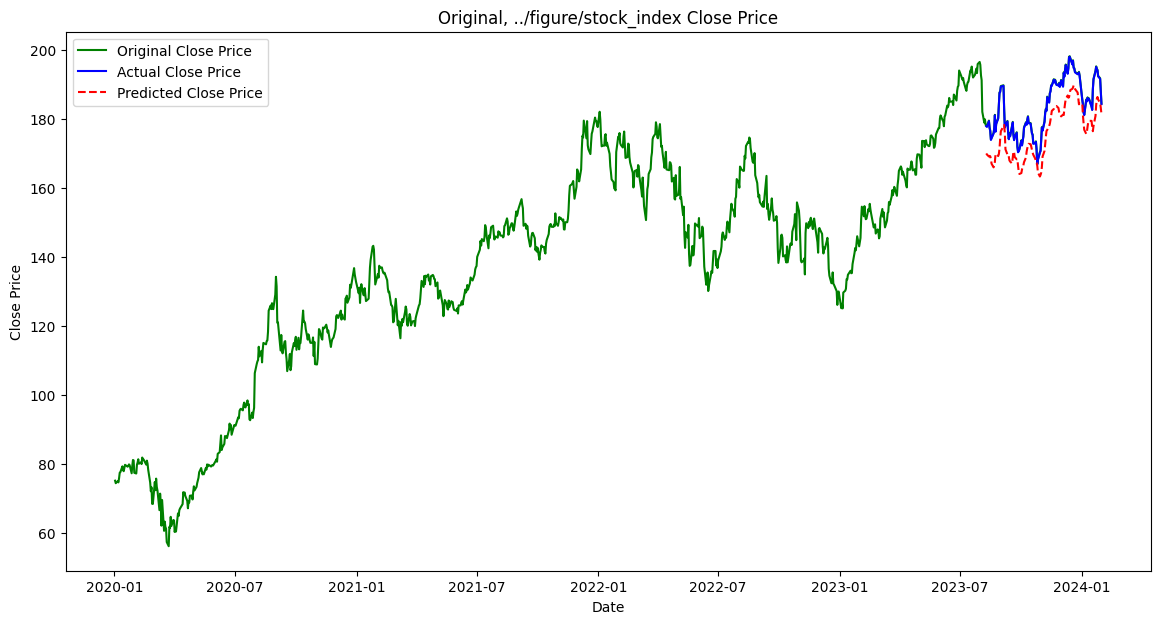

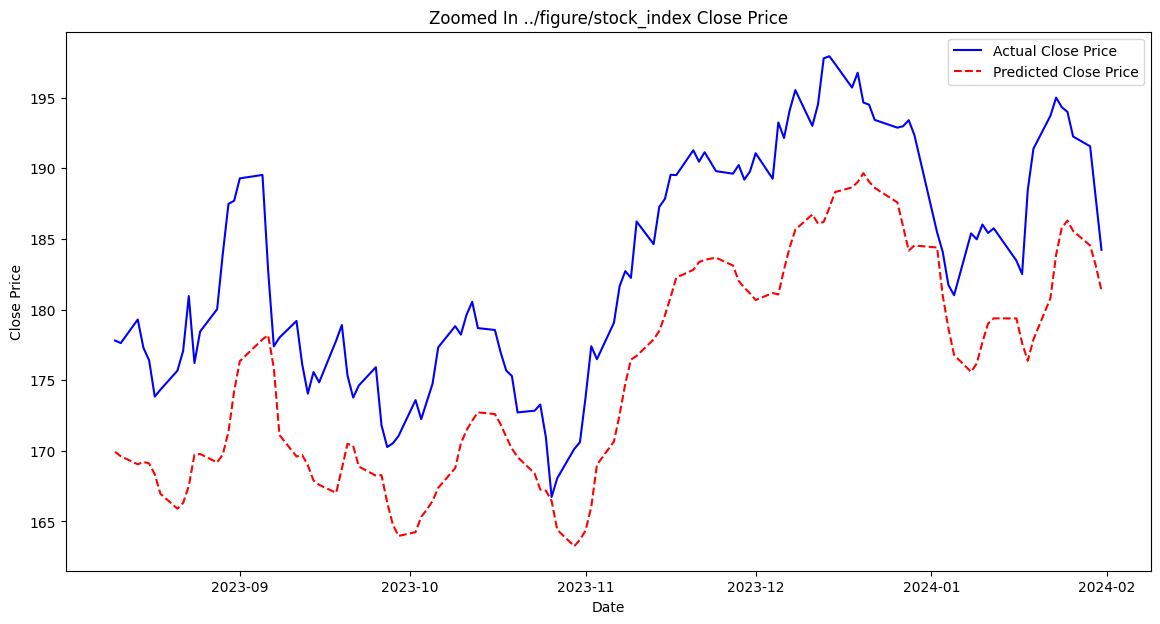

In [11]:
stock_index_lstm = dual_lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock, X_seq_train_index)
y_pred_index = stock_index_lstm.predict((X_seq_test_stock, X_seq_test_index))


y_pred_index, y_test_index = unpack_scaled(y_pred_index, y_seq_test_stock, scaler)


visualize(AAPL, y_pred_index, y_test_index, "../figure/stock_index")
zoom_visualize(AAPL, y_pred_index, y_test_index, "../figure/stock_index")

In [12]:
result.loc['stock+index'] = evaluate_report(y_pred_index, y_test_index)

Mean Squared Error:  66.083
Mean Absolute Percentage Error:  0.041


# LSTM (stock + noise)

In [13]:
stock_noise_config = Config(epochs=50,
                            batch_size=32,
                            learning_rate=0.001,
                            lstm_node1=64,
                            lstm_node2=32,
                            drop_out_rate=0.5)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 7, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 7, 128)    │     70,656 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 7, 128)    │     71,168 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 7, 128)    │          0 │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 7, 128)    │          0 │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 64)        │     49,408 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 64)        │     49,408 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ dropout_7[0][0],  │
│ (Concatenate)       │                   │            │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        129 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 240,769 (940.50 KB)

 Trainable params: 240,769 (940.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


23/23 - 4s - 159ms/step - loss: 0.2267 - val_loss: 0.1640
Epoch 2/50
23/23 - 0s - 5ms/step - loss: 0.0577 - val_loss: 0.0497
Epoch 3/50
23/23 - 0s - 5ms/step - loss: 0.0454 - val_loss: 0.0317
Epoch 4/50
23/23 - 0s - 5ms/step - loss: 0.0442 - val_loss: 0.0359
Epoch 5/50
23/23 - 0s - 5ms/step - loss: 0.0389 - val_loss: 0.0371
Epoch 6/50
23/23 - 0s - 5ms/step - loss: 0.0365 - val_loss: 0.0267
Epoch 7/50
23/23 - 0s - 5ms/step - loss: 0.0406 - val_loss: 0.0218
Epoch 8/50
23/23 - 0s - 5ms/step - loss: 0.0387 - val_loss: 0.0419
Epoch 9/50
23/23 - 0s - 5ms/step - loss: 0.0373 - val_loss: 0.0317
Epoch 10/50
23/23 - 0s - 5ms/step - loss: 0.0340 - val_loss: 0.0316
Epoch 11/50
23/23 - 0s - 5ms/step - loss: 0.0374 - val_loss: 0.0197
Epoch 12/50
23/23 - 0s - 5ms/step - loss: 0.0367 - val_loss: 0.0400
Epoch 13/50
23/23 - 0s - 5ms/step - loss: 0.0349 - val_loss: 0.0287
Epoch 14/50
23/23 - 0s - 5ms/step - loss: 0.0326 - val_loss: 0.0503
Epoch 15/50
23/23 - 0s - 5ms/step - loss: 0.0289 - val_loss: 0.023

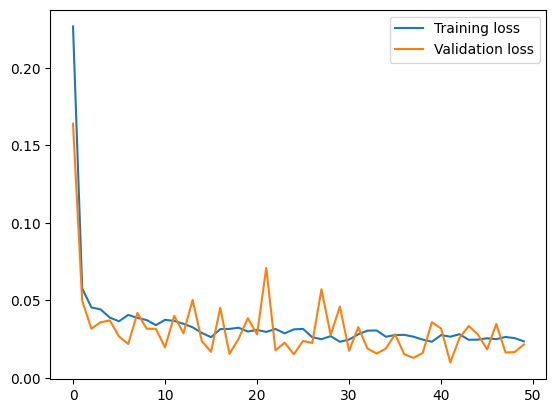

Training loss:  0.023562049493193626
Validation loss:  0.021572845056653023
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E88B897D80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


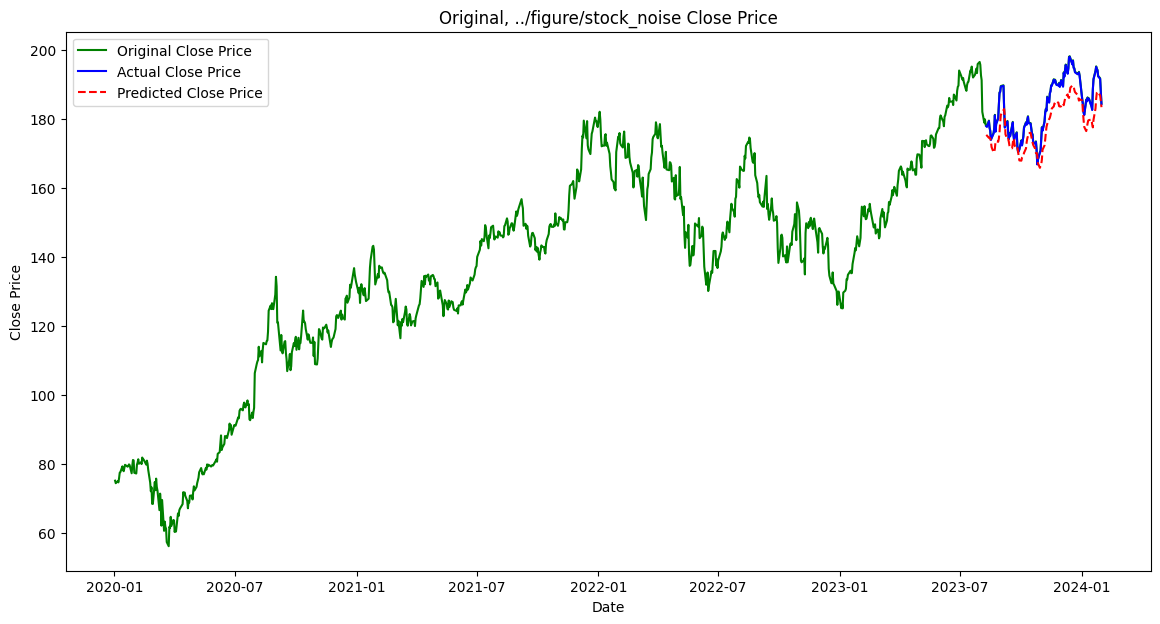

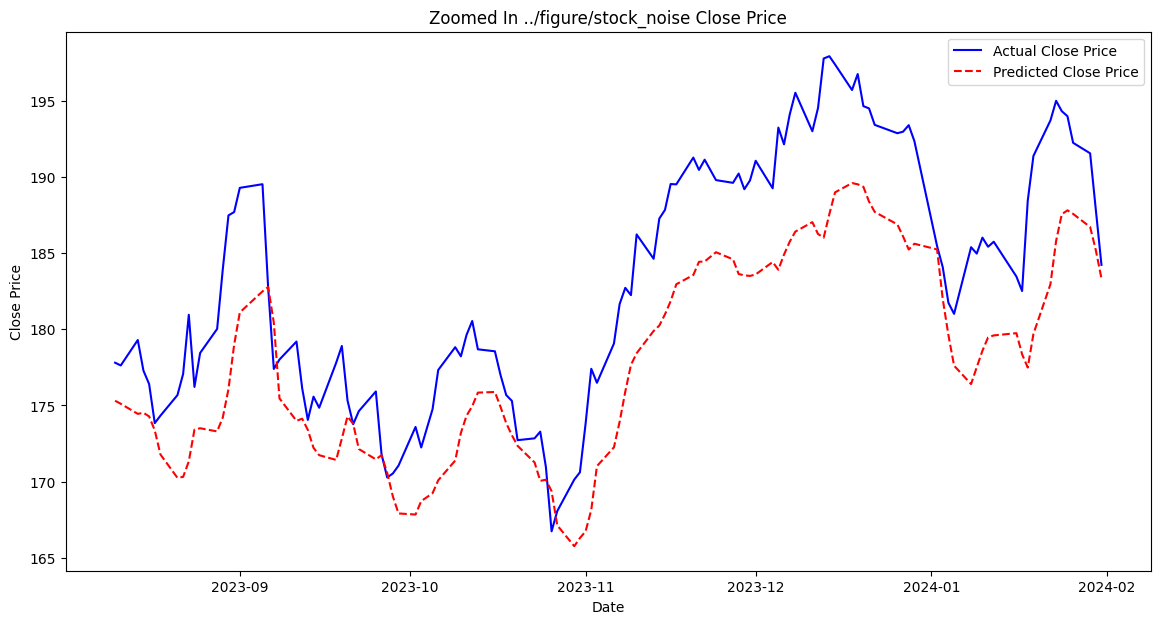

In [14]:
stock_noise_lstm = dual_lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock, X_seq_train_noise)
y_pred_noise = stock_noise_lstm.predict((X_seq_test_stock, X_seq_test_noise))


y_pred_noise, y_test_noise = unpack_scaled(y_pred_noise, y_seq_test_stock, scaler)


visualize(AAPL, y_pred_noise, y_test_noise, "../figure/stock_noise")
zoom_visualize(AAPL, y_pred_noise, y_test_noise, "../figure/stock_noise")

In [15]:
result.loc['stock+noise'] = evaluate_report(y_pred_noise, y_test_noise)

Mean Squared Error:  35.767
Mean Absolute Percentage Error:  0.028


# LSTM (stock + index + noise)

In [16]:
stock_index_noise_config = Config(epochs=70,
                                  batch_size=32,
                                  learning_rate=0.001,
                                  lstm_node1=32,
                                  lstm_node2=16,
                                  drop_out_rate=0.5)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 7, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 21, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 7, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 7, 128)    │     70,656 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_12 (LSTM)      │ (None, 21, 128)   │     70,656 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_14 (LSTM)      │ (None, 7, 128)    │     71,168 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 7, 128)    │          0 │ lstm_10[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 21, 128)   │          0 │ lstm_12[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 7, 128)    │          0 │ lstm_14[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ (None, 64)        │     49,408 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_13 (LSTM)      │ (None, 64)        │     49,408 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 64)        │     49,408 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ lstm_11[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 64)        │          0 │ lstm_13[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ lstm_15[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 192)       │          0 │ dropout_11[0][0], │
│ (Concatenate)       │                   │            │ dropout_13[0][0], │
│                     │                   │            │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        193 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 360,897 (1.38 MB)

 Trainable params: 360,897 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


23/23 - 6s - 247ms/step - loss: 0.1577 - val_loss: 0.1636
Epoch 2/50
23/23 - 0s - 9ms/step - loss: 0.0554 - val_loss: 0.0928
Epoch 3/50
23/23 - 0s - 9ms/step - loss: 0.0437 - val_loss: 0.0781
Epoch 4/50
23/23 - 0s - 10ms/step - loss: 0.0315 - val_loss: 0.0775
Epoch 5/50
23/23 - 0s - 10ms/step - loss: 0.0351 - val_loss: 0.0736
Epoch 6/50
23/23 - 0s - 10ms/step - loss: 0.0355 - val_loss: 0.0664
Epoch 7/50
23/23 - 0s - 9ms/step - loss: 0.0337 - val_loss: 0.1026
Epoch 8/50
23/23 - 0s - 9ms/step - loss: 0.0346 - val_loss: 0.0346
Epoch 9/50
23/23 - 0s - 9ms/step - loss: 0.0283 - val_loss: 0.0568
Epoch 10/50
23/23 - 0s - 9ms/step - loss: 0.0289 - val_loss: 0.0897
Epoch 11/50
23/23 - 0s - 9ms/step - loss: 0.0319 - val_loss: 0.0792
Epoch 12/50
23/23 - 0s - 9ms/step - loss: 0.0316 - val_loss: 0.0598
Epoch 13/50
23/23 - 0s - 9ms/step - loss: 0.0293 - val_loss: 0.0295
Epoch 14/50
23/23 - 0s - 9ms/step - loss: 0.0252 - val_loss: 0.0605
Epoch 15/50
23/23 - 0s - 9ms/step - loss: 0.0262 - val_loss: 0.

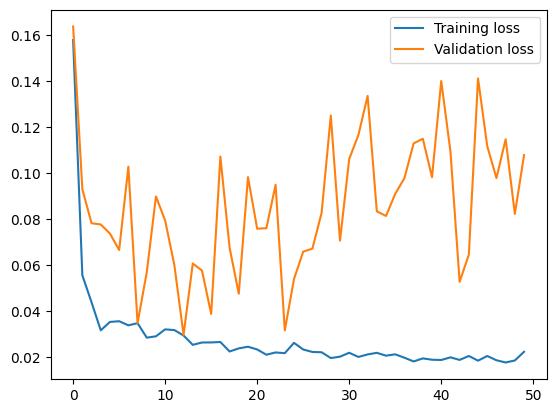

Training loss:  0.02217143401503563
Validation loss:  0.10767129063606262
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


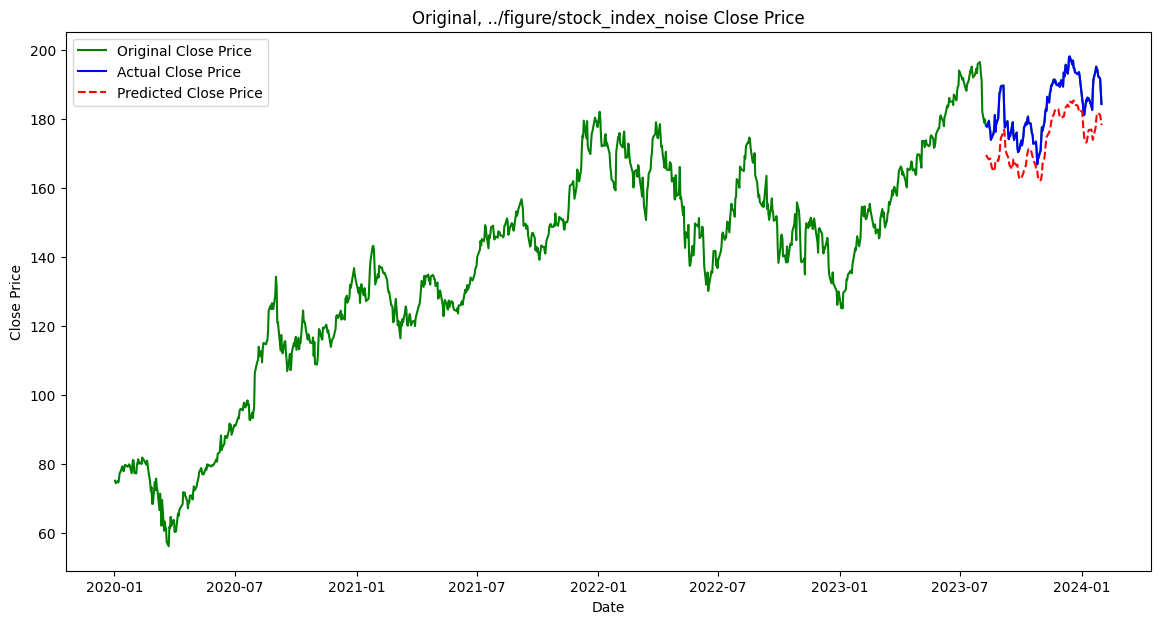

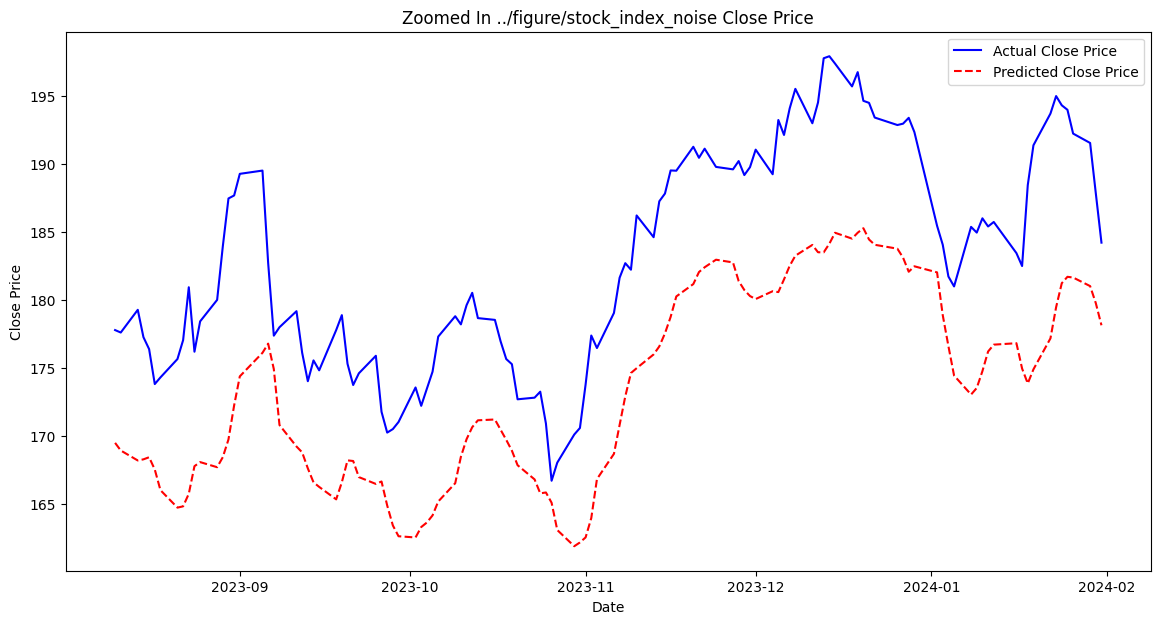

In [17]:
stock_index_noise_lstm = triple_lstm_model(stock_config, X_seq_train_stock, y_seq_train_stock, X_seq_train_index, X_seq_train_noise)
y_pred_index_noise = stock_index_noise_lstm.predict((X_seq_test_stock, X_seq_test_index, X_seq_test_noise))


y_pred_index_noise, y_test_index_noise = unpack_scaled(y_pred_index_noise, y_seq_test_stock, scaler)


visualize(AAPL, y_pred_index_noise, y_test_index_noise, "../figure/stock_index_noise")
zoom_visualize(AAPL, y_pred_index_noise, y_test_index_noise, "../figure/stock_index_noise")

In [18]:
result.loc['stock+index+noise'] = evaluate_report(y_pred_index_noise, y_test_index_noise)

Mean Squared Error:  100.589
Mean Absolute Percentage Error:  0.052


# Evaluate

In [19]:
result

,MSE,MAPE
stock,27.225675,0.02459
stock+index,66.082507,0.041491
stock+noise,35.767067,0.028363
stock+index+noise,100.588648,0.05205


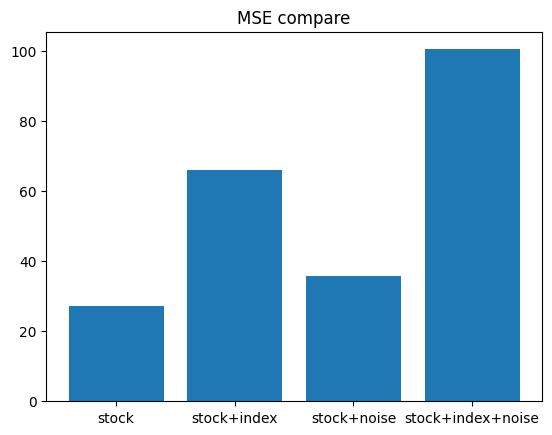

In [20]:
plt.title("MSE compare")
plt.bar(result.index, result['MSE'])
plt.savefig("../figure/MSE_compare")
plt.show()

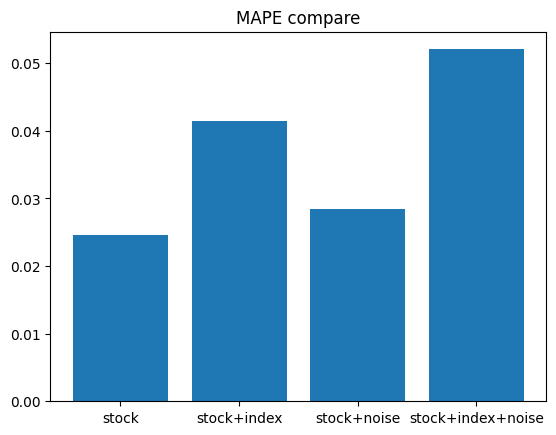

In [21]:
plt.title("MAPE compare")
plt.bar(result.index, result['MAPE'])
plt.savefig("../figure/MAPE_compare")
plt.show()